In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

fm.get_fontconfig_fonts()
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format='retina'

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 예제 데이터 실습

#### 1. 데이터 불러오기 

In [4]:
data = pd.read_csv('./data/yelp.csv', index_col = 0)
display(data.head(3))
print(data.info())

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB
None


In [5]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


#### 2. EDA 데이터 파악

In [6]:
# 불필요한 데이터 삭제
data.drop(['review_id', 'user_id', 'business_id', 'date'], axis = 1, inplace = True)
data.head(3)

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1


In [8]:
print(data.iloc[0]['text'])
len(data.iloc[0]['text'])

LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.


347

In [10]:
# 텍스트 글자 수를 의미하는 새로운 변수 생성
data['text_length'] = data['text'].apply(len)
data.head(3)

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663


In [11]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

<AxesSubplot:xlabel='stars', ylabel='count'>

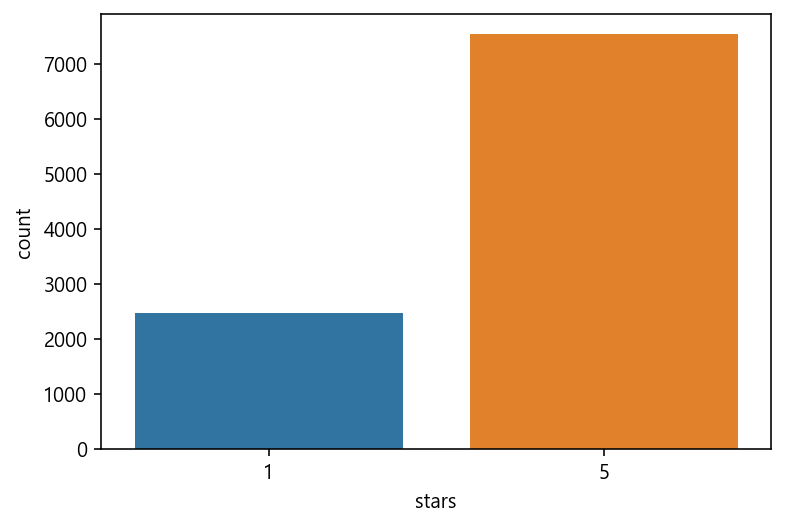

In [12]:
# 별점 분포 확인
sns.countplot(data['stars'])

<AxesSubplot:xlabel='text_length', ylabel='Density'>

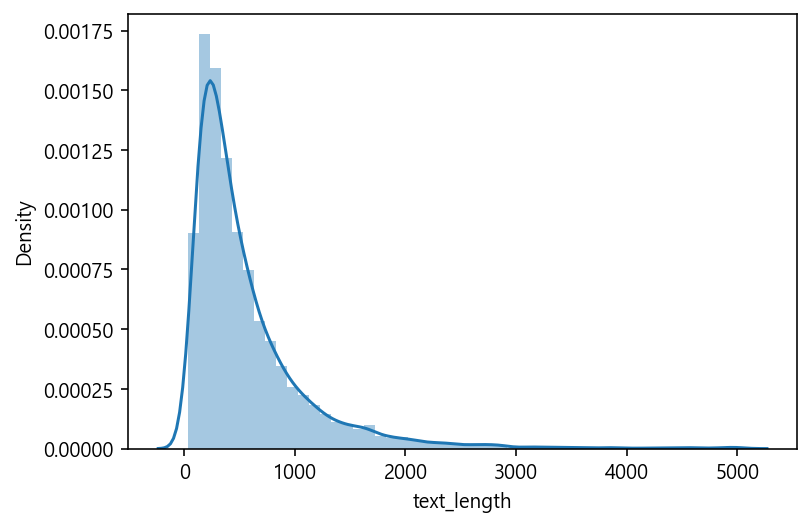

In [14]:
# 리뷰 글자 수 분포 확인
sns.distplot(data['text_length'])

<AxesSubplot:>

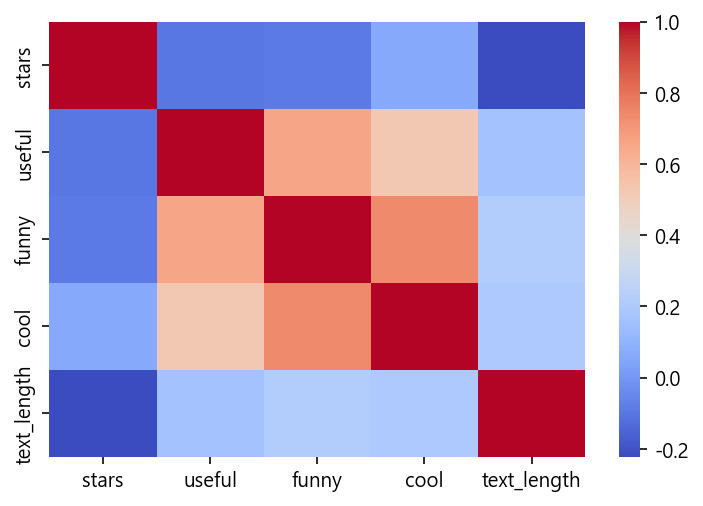

In [17]:
# 변수간 상관분석
sns.heatmap(data.corr(), cmap = 'coolwarm')

In [ ]:
##### 워드클라우드

In [18]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

In [20]:
# 특수문자가 포함된 함수
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# 텍스트에서 특수문자를 뺀 나머지 글자만 추출
s = data.iloc[0]['text']

def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)
    return new_s

data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [29]:
# 위의 함수로 만든 코드를 한줄로 만들기
''.join([i for i in s if i not in string.punctuation])

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [30]:
data['text'] = data['text'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
data.head(3)

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663


In [33]:
from nltk.corpus import stopwords

In [35]:
# 실행이 안되는 경우 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EunHye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
# 영어문자에서 상투적인 단어 삭제를 위해 사용
stopwords.words('english')[:3]

['i', 'me', 'my']

In [49]:
def stop_w(x):
    new_s = []
    
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

data['text'] = data['text'].apply(stop_w)   

# # 아래 코드처럼 한줄로 만들 수 있음
# data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])